In [1]:
import os
from snudda import SnuddaInit

snudda_data = "/Users/peirui/BasalGangliaData/data"
os.environ["SNUDDA_DATA"] = snudda_data


network_path = os.path.join("networks","simple_example_parallel")
si = SnuddaInit(struct_def={}, network_path=network_path, random_seed=123,snudda_data=snudda_data)
si.define_striatum(num_dSPN=200, num_iSPN=200, num_FS=4, num_LTS=0, num_ChIN=0,
                    volume_type="cube", neurons_dir="$DATA/neurons")
si.write_json()

Using cube for striatum
Neurons for striatum read from /Users/peirui/BasalGangliaData/data/neurons/striatum
Adding neurons: FS from dir /Users/peirui/BasalGangliaData/data/neurons/striatum/fs
Adding neurons: dSPN from dir /Users/peirui/BasalGangliaData/data/neurons/striatum/dspn
Adding neurons: iSPN from dir /Users/peirui/BasalGangliaData/data/neurons/striatum/ispn
ChIN: Skipping neuron because, num_neurons =0
LTS: Skipping neuron because, num_neurons =0
NGF: Skipping neuron because, num_neurons =0
Writing networks/simple_example_parallel/network-config.json


In [2]:
os.environ["IPYTHONDIR"] = os.path.join(os.path.abspath(os.getcwd()), ".ipython")
os.environ["IPYTHON_PROFILE"] = "default"
os.system("ipcluster start -n 4 --profile=$IPYTHON_PROFILE --ip=127.0.0.1 --log-level ERROR 2> parallel-log.txt &")

import time
time.sleep(10) # Wait for ipcluster to start

In [3]:
from snudda import Snudda
snd = Snudda(network_path=network_path, parallel=True, ipython_profile="default")
snd.create_network()

Placing neurons
Network path: networks/simple_example_parallel
Creating missing directory networks/simple_example_parallel/log
Created directory networks/simple_example_parallel/log
Reading IPYPARALLEL connection info from /Users/peirui/Snudda/examples/notebooks/.ipython/profile_default/security/ipcontroller-client.json

Detected 4 engines from /Users/peirui/Snudda/examples/notebooks/.ipython/profile_default/log/engines.json
Setting SNUDDA_DATA environment variable on workers to /Users/peirui/BasalGangliaData/data
Reading SNUDDA_DATA=/Users/peirui/BasalGangliaData/data from networks/simple_example_parallel/network-config.json
No n_putative_points and putative_density, setting n_putative_points = 2444
(this must be larger than the number of neurons you want to place)
Generating 2444 points for networks/simple_example_parallel/mesh/Striatum-cube-mesh-0.00017120975070990257.obj
Filtering, keeping inside points: 568 / 960
neuron_name = 'FS_0', num = np.int64(0), neuron_path = '$SNUDDA_DATA

In [4]:
snd = Snudda(network_path=network_path)
snd.setup_input(input_config=os.path.join("input_config","simple-input-2.json"),parallel=True, ipython_profile="default")

Setting up inputs, assuming input.json exists
Reading IPYPARALLEL connection info from /Users/peirui/Snudda/examples/notebooks/.ipython/profile_default/security/ipcontroller-client.json

Detected 4 engines from /Users/peirui/Snudda/examples/notebooks/.ipython/profile_default/log/engines.json
Setting SNUDDA_DATA environment variable on workers to /Users/peirui/BasalGangliaData/data
Reading SNUDDA_DATA=/Users/peirui/BasalGangliaData/data from networks/simple_example_parallel/network-config.json
Writing input spikes to networks/simple_example_parallel/input-spikes.hdf5
Reading SNUDDA_DATA=/Users/peirui/BasalGangliaData/data from networks/simple_example_parallel/network-config.json
importing SnuddaInput from snudda.input.input on engine(s)
Writing spikes to networks/simple_example_parallel/input-spikes.hdf5
Calling cleanup on workers (log file already closed).
Closing remote client (ipcluster kept running)


In [5]:
os.system("ipcluster stop")

2025-12-04 17:47:01.048 [IPClusterStop] Stopping cluster 
2025-12-04 17:47:01.048 [IPClusterStop] Stopping controller
2025-12-04 17:47:01.144 [IPClusterStop] Stopping engine(s): 1764866783


0

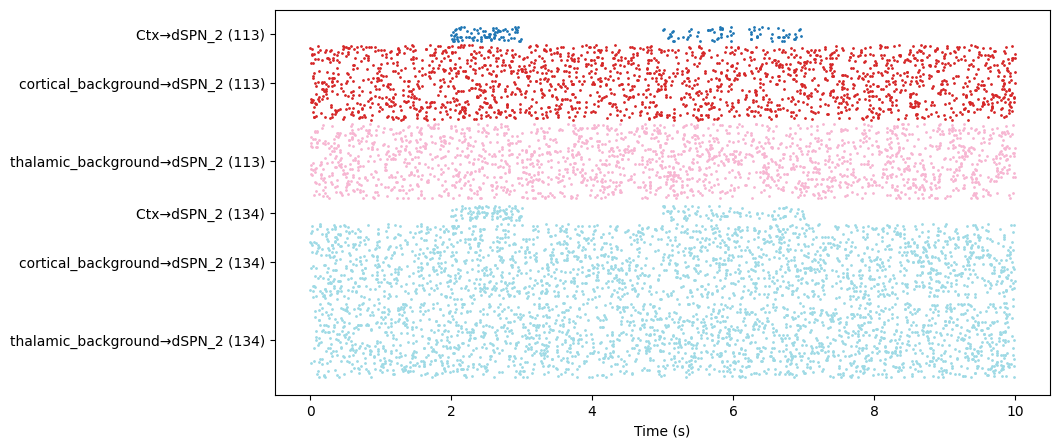

In [6]:
from snudda.plotting import PlotInput
input_file = os.path.join(network_path, "input-spikes.hdf5")
spi = PlotInput(input_file, network_path=network_path)
#spi.plot_input(neuron_type="FS", num_neurons=3)
spi.plot_input(neuron_type="dSPN", num_neurons=2)
#spi.plot_input(neuron_type="iSPN", num_neurons=2)

In [11]:
from neuron import h, load_mechanisms
load_mechanisms("/Users/peirui/BasalGangliaData/data/neurons/mechanisms")
print("tmGabaA available?", hasattr(h, "tmGabaA"))


tmGabaA available? True


In [12]:

import os
duration = 3.5
n_cores = 4
network_path = os.path.join("networks","simple_example_parallel")
snudda_data = "/Users/peirui/BasalGangliaData/data"
cmd_str = f"snudda simulate {network_path} --time {duration} --snudda_data {snudda_data}  --mech_dir /Users/peirui/BasalGangliaData/data/neurons/mechanisms/"
print(cmd_str)
os.system(cmd_str)


snudda simulate networks/simple_example_parallel --time 3.5 --snudda_data /Users/peirui/BasalGangliaData/data  --mech_dir /Users/peirui/BasalGangliaData/data/neurons/mechanisms/
args.ipython_profile = None


[peiruideMBP:90877] shmem: mmap: an error occurred while determining whether or not /var/folders/9r/0x_ghsgx6rq8rfjwc7s_9ljw0000gn/T//ompi.peiruideMBP.501/jf.0/998637568/sm_segment.peiruideMBP.501.3b860000.0 could be created.
Traceback (most recent call last):
  File "/Users/peirui/miniconda3/envs/snudda_env/bin/snudda", line 7, in <module>
    sys.exit(snudda_cli())
             ^^^^^^^^^^^^
  File "/Users/peirui/miniconda3/envs/snudda_env/lib/python3.12/site-packages/snudda/cli.py", line 209, in snudda_cli
    actions[args.action](args)
  File "/Users/peirui/miniconda3/envs/snudda_env/lib/python3.12/site-packages/snudda/core.py", line 775, in simulate_wrapper
    sim = self.simulate(network_file=args.network_file, input_file=args.input_file,
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/peirui/miniconda3/envs/snudda_env/lib/python3.12/site-packages/snudda/core.py", line 893, in simulate
    sim.setup()
  File "/Users/peirui/minicon

numprocs=1
args: Namespace(action='simulate', path='networks/simple_example_parallel', network_file=None, input_file=None, output_file=None, time=3.5, snudda_data='/Users/peirui/BasalGangliaData/data', simulation_config=None, record_volt=True, randomseed=None, disable_synapses=None, disable_gj=None, mech_dir='/Users/peirui/BasalGangliaData/data/neurons/mechanisms/', profile=False, verbose=False, export_core_neuron=False, record_all=None, enable_rxd_neuromodulation=None, disable_rxd_neuromodulation=None, ipython_profile=None)
MPI Rank: 0, Size: 1
Using input file networks/simple_example_parallel/input-spikes.hdf5
NEURON mechanisms already compiled, make sure you have the correct version of NEURON modules.
If you delete x86_64, aarch64, arm64 directories (or nrnmech.dll) then you will force a recompilation of the modules.
MPI Rank: 0, Size: 1 -- NEURON: This is node 0 out of 1
0 : Memory status: 12% free
RxD for neuromodulation: DISABLED.


256

In [9]:
import json, os

network_path = "networks/simple_example_parallel"

with open(os.path.join(network_path, "network-config.json")) as f:
    net = json.load(f)

print("snudda_data  =", net.get("snudda_data"))
print("neurons_dir  =", net.get("neurons_dir"))
print("mechanisms   =", os.path.join(net.get("snudda_data"), "neurons", "mechanisms"))


snudda_data  = /Users/peirui/BasalGangliaData/data
neurons_dir  = None
mechanisms   = /Users/peirui/BasalGangliaData/data/neurons/mechanisms


In [10]:
from snudda.utils import SnuddaLoad
from snudda.utils import SnuddaLoadSimulation

sl = SnuddaLoad(network_path)

sim_file = os.path.join(network_path, "simulation", "output.hdf5")
network_file = os.path.join(network_path, "network-synapses.hdf5")

sls = SnuddaLoadSimulation(network_simulation_output_file=sim_file)

Loading networks/simple_example_parallel/simulation/output.hdf5


FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = 'networks/simple_example_parallel/simulation/output.hdf5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)